# _kNN_: _k_-Vecinos Cercanos

Es un algoritmo de aprendizaje supervisado en el que se asigna a un punto de prueba, la clase mayoritaria entre los _k_ vecinos más próximos, utilizando una métrica de distancia. En la siguiente figura se puede ver un ejemplo para _k_ = 5

In [ ]:
# Esta parte esta comentada porque no utilizamos Colab
#import sys
#from IPython.display import Image, display
#if 'google.colab' in sys.modules:
#    from google.colab import drive
#    drive.mount('/content/drive')
#    %cd '/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas'

#display(Image(filename='./2_imagenes/knn.png', width=700))

## Métricas de distancia

### Minkowski:$\qquad d(\textbf{x}^{[a]}, \textbf{x}^{[b]}) = [ \sum\limits_{j=1}^{m}{(|x_j^{[a]}-x_j^{[b]}|)^p} ]^{\frac{1}{p}}$

### Manhattan: $\quad p=1 \quad d(\textbf{x}^{[a]}, \textbf{x}^{[b]}) =  \sum\limits_{j=1}^{m}{|x_j^{[a]}-x_j^{[b]}|}$

### Euclídea: $\quad p=2 \quad d(\textbf{x}^{[a]}, \textbf{x}^{[b]}) = \sqrt{ \sum\limits_{j=1}^{m}{(x_j^{[a]}-x_j^{[b]})^2}}$

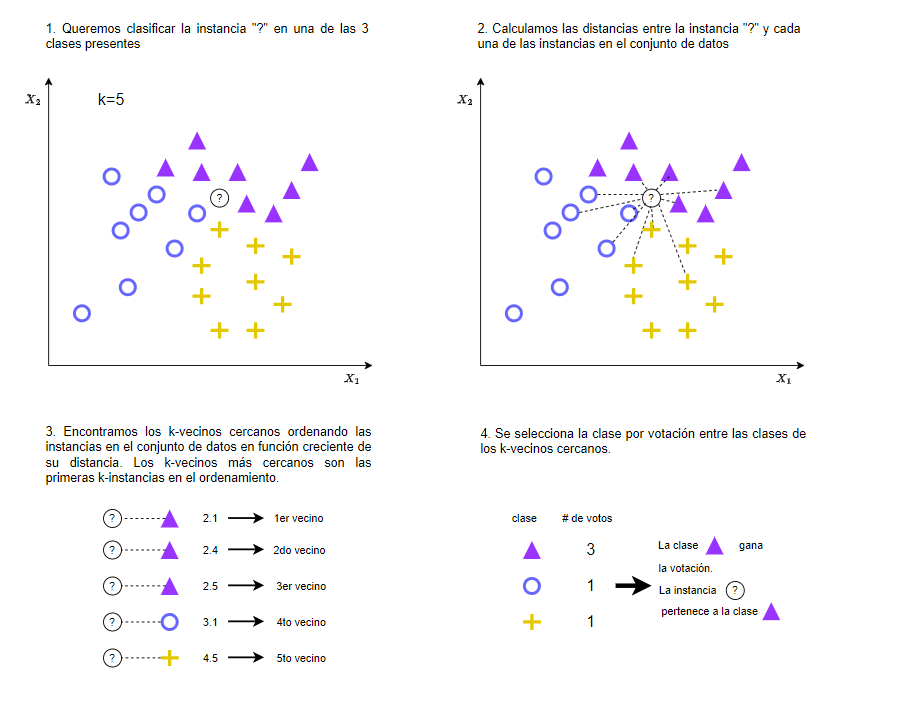

In [ ]:
#display(Image(filename='./2_imagenes/knn_algo.png', width=900))

## Clase KNN

In [32]:
# Importamos algunas librerias
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [20]:
df_iris = load_iris(as_frame=True).frame
X = df_iris[ ['petal length (cm)', 'petal width (cm)'] ]
y = df_iris.target

In [21]:
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1,  stratify = y)

In [23]:
# Normalización de los datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [24]:
class KNN:
    """Clasificador KNN.

    Parámetros
    ------------
    k : int
        número de vecinos cercanos
    p : int
        valor para selección de métrica (1: Manhattan, 2: Euclídea)
    """

    def __init__(self, k=3, p=2):
        self.k = k
        self.p = p

    def distancia(self, vec_1, vec_2, p=2):
        dim = len(vec_1)
        distance=0

        for d in range(dim):
            distance += (abs(vec_1[d]-vec_2[d]))**p

        distance = (distance)**(1/p)
        return distance

    def fit(self, X, y):
        """Entrenamiento del clasificador kNN, es un algoritmo 'perezoso'
        sólo almacena los datos y sus etiquetas
        Parameters
        ----------
        X : array
            vector de características.
        y : array
            clases asociadas a los datos.
        """
        self.X = np.array(X)
        self.y = np.array(y)
        self.n_datos = X.shape[0]

    def predict(self, x):
        """Función que realiza la predicción.
        Parameters
        ----------
        x : array
            vector de patrones de entrada.

        Returns
        -------
        vector de predicciones.
        """
        y_pred = []

        for punto_prueba in x:
            #----------------------------------
            distancias = np.empty(self.n_datos)

            for n in range(self.n_datos):
                distancias[n] = self.distancia(punto_prueba, self.X[n, :]) # Inicializamos un array que contendrá las distancias entre el punto de prueba con cada punto del set de entrenamiento

            k_indices = np.argsort(distancias)[:self.k] # Se ordenan las distancias de manera ascendente

            k_etiquetas = self.y[k_indices] # Los indices obtenidos se usan para sacar la etiqueta

            c = Counter(k_etiquetas).most_common(1) # Contamos la frecuencia de cada etiqueta. Nos quedamos con la más comun

            y_pred.append(c[0][0]) # Añadimos la etiqueta a las predicciones
            #----------------------------------
        return np.asarray(y_pred) #predicciones

## Usamos el clasificador

In [25]:
# Creamos un objeto knn usando la clase implementada
knn = KNN(k=3)
# llamamos al método de entrenamiento ---> Datos de entrenamiento
knn.fit(X_train_std, y_train)

In [26]:
# Evaluamos el clasificador con los datos de prueba
y_pred = knn.predict(X_test_std)
# Comparamos nuestra predicción con los targets
(y_pred==y_test).sum()

np.int64(45)

A continuación vamos a utilizar una función `plot_decision_regions` implementada en el archivo `graficacion.py` de la carpeta `modulos` para graficar las regiones de clasificación.
Se va a crear un mapa de colores en función del resultado de la predicción de nuestro clasificador.
Utilizaremos la misma función con otros clasificadores. Notar que se pasa un clasificador como parámetro y que en su interior se hace una llamada al método `predict()` del clasificador.

In [27]:
import matplotlib.pyplot as plt
from modulos.graficacion import plot_decision_regions 

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plt.figure(figsize=(8,6))
plot_decision_regions( X=X_combined_std, y=y_combined, clasificador=knn, test_idx=range(105, 150), resolution=0.05)
plt.xlabel('longitud de pétalo [standardized]')
plt.ylabel('ancho de pétalo [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'modulos'

In [33]:
y_pred = knn.predict(X_test_std)

In [34]:
def accuracy(y_pred, y_test):
    return np.sum( np.equal(y_pred, y_test) ) / len(y_test)

print(accuracy(y_pred, y_test))


1.0


# KNN usando _scikit-Learn_

### Cargamos los datos

El conjunto de datos en el archivo `prestamos.csv` muestra algunos registros de préstamos personales de LendingClub. LendingClub es líder en préstamos entre pares en el que grupos de inversionistas otorgan préstamos personales a individuos. El objetivo del análisis de este conjunto de datos es predecir el resultado de un nuevo préstamo potencial. Las opciones del resultado son: _pagado_ o _incumplido_.

In [35]:
#ruta = ""
ruta = "d:/Users/Laura/Desktop/Aprendizaje_Maquinal/Aprendizaje-Maquinal/KNN/1_datos/prestamos.csv"

df_prestamos = pd.read_csv(ruta, index_col=False)
df_prestamos.head() # Mostramos las primeras lineas del data frame

,tasa de interes,plazo prestamo,fico limite inferior,fico limite superior,deudas_ingresos,estado
0,12.62,36,690.0,694.0,18.75,pagado
1,16.99,36,670.0,674.0,24.54,pagado
2,10.15,36,700.0,704.0,6.95,pagado
3,6.89,36,740.0,744.0,7.78,pagado
4,10.42,60,730.0,734.0,18.84,pagado


In [36]:
df_prestamos.info() # Vemos la cantidad de datos nulos que tiene cada variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134531 entries, 0 to 134530
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   tasa de interes       134531 non-null  float64
 1   plazo prestamo        134531 non-null  int64  
 2   fico limite inferior  134531 non-null  float64
 3   fico limite superior  134531 non-null  float64
 4   deudas_ingresos       134503 non-null  float64
 5   estado                134531 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.2+ MB


### Dividimos los datos en entrenamiento y prueba

20% datos de prueba, utilice `random_state=42`, estratificar en función de la clase.


In [37]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_prestamos, test_size=0.2, stratify=df_prestamos["plazo prestamo"], random_state=42) # dividimos los datos en 80% (entrenamiento) - 20% (testeo)

### Separamos predictores de las etiquetas

In [38]:
X_entrena = train_set.drop("estado", axis=1) # separamos del conjunto de datos de entrenamiento a nuestra variable a predecir
y_entrena = train_set["estado"].copy()

**Hay datos faltantes?**


In [39]:
# índices de las filas con datos faltantes en el conjunto de datos de entrenamiento
indices_nulos_train = X_entrena.isnull().any(axis=1)
X_entrena.loc[indices_nulos_train]

,tasa de interes,plazo prestamo,fico limite inferior,fico limite superior,deudas_ingresos
126541,11.44,60,760.0,764.0,NaN
16066,21.49,60,690.0,694.0,NaN
100991,13.99,36,685.0,689.0,NaN
99638,11.47,36,665.0,669.0,NaN
40718,22.35,36,700.0,704.0,NaN
25178,11.99,36,720.0,724.0,NaN
32647,13.59,36,760.0,764.0,NaN
64963,15.02,60,705.0,709.0,NaN
74543,22.91,36,665.0,669.0,NaN
90058,7.07,36,815.0,819.0,NaN


In [40]:
# Imputamos los datos de entrenamiento
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

prestamos_train_num = X_entrena.copy()
imputer.fit(prestamos_train_num)

imputer.statistics_

X_train = imputer.transform(prestamos_train_num) 
type(X_train)
   
imputer.feature_names_in_

X_train_inputado = pd.DataFrame(X_train, columns=prestamos_train_num.columns, index=prestamos_train_num.index)
X_train_inputado.loc[indices_nulos_train].head()

,tasa de interes,plazo prestamo,fico limite inferior,fico limite superior,deudas_ingresos
126541,11.44,60.0,760.0,764.0,17.64
16066,21.49,60.0,690.0,694.0,17.64
100991,13.99,36.0,685.0,689.0,17.64
99638,11.47,36.0,665.0,669.0,17.64
40718,22.35,36.0,700.0,704.0,17.64


In [41]:
# Imputamos los datos de testeo con las medianas de los datos de entrenamiento
prestamos_test = test_set.copy()
prestamos_test_labels = prestamos_test["estado"].copy()

prestamos_test_num = prestamos_test.drop(["estado"], axis=1)
prestamos_test_num

X_test = imputer.transform(prestamos_test_num) # me devuelve un numpy array
X_test_inputado = pd.DataFrame(X_test, columns=prestamos_test_num.columns, index=prestamos_test_num.index)

**Es necesario escalar los datos?**

In [42]:
# Nos fijamos todos los estadisticos de las variables para saber si hay algunas que son medidas con diferentes escalas
df_prestamos.describe()

# Creemos que no es necesario escalar los datos, ya que las escalas de las variables son iguales en todos los registros.

,tasa de interes,plazo prestamo,fico limite inferior,fico limite superior,deudas_ingresos
count,134531.000000,134531.000000,134531.000000,134531.000000,134503.000000
mean,13.264545,41.822182,696.100378,700.100542,18.254560
std,4.764991,10.287631,31.805769,31.806537,10.203921
min,5.310000,36.000000,660.000000,664.000000,0.000000
25%,9.750000,36.000000,670.000000,674.000000,11.790000
50%,12.740000,36.000000,690.000000,694.000000,17.640000
75%,16.010000,36.000000,710.000000,714.000000,24.030000
max,30.990000,60.000000,845.000000,850.000000,999.000000


### Pasamos la variable 'estado' a dummies (en duda para trabajar)

In [43]:
prestamos_train_cat = train_set.loc[:,["estado"]]
prestamos_train_cat.head()

,estado
95787,incumplido
112420,pagado
71814,pagado
23228,pagado
92569,incumplido


In [44]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
prestamos_train_cat_1hot = cat_encoder.fit_transform(prestamos_train_cat)
prestamos_train_cat_1hot
prestamos_train_cat_1hot.toarray()

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [45]:
cat_encoder.feature_names_in_

array(['estado'], dtype=object)

In [46]:
cat_encoder.get_feature_names_out()

array(['estado_incumplido', 'estado_pagado'], dtype=object)

In [47]:
df_prestamos_train_cat_1hot = pd.DataFrame(prestamos_train_cat_1hot.toarray(), columns=cat_encoder.get_feature_names_out(), index=prestamos_train_cat.index)
df_prestamos_train_cat_1hot

,estado_incumplido,estado_pagado
95787,1.0,0.0
112420,0.0,1.0
71814,0.0,1.0
23228,0.0,1.0
92569,1.0,0.0
...,...,...
99464,0.0,1.0
88817,0.0,1.0
26253,0.0,1.0
87907,0.0,1.0


### Entrenamiento del clasificador [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

Antes de entrenar nuestro clasificador, vamos a dividir los datos de entrenamiento en un conjunto de validación `X_valid` y uno de entrenamiento nuevo. Para esto, tomemos las primeras 20000 muestras como conjunto de validación. No olvidar dividir también las etiquetas.

In [48]:
X_valid = X_train_inputado[:20000]
Y_valid = y_entrena[:20000]

X_train = X_train_inputado[20000:]
Y_train = y_entrena[20000:]

In [49]:
# Creamos un objeto knn usando la clase implementada
knn = KNN(k=3)
# llamamos al método de entrenamiento ---> Datos de entrenamiento
knn.fit(X_train, Y_train)

In [50]:
# Evaluamos el clasificador con los datos de prueba
y_pred = knn.predict(X_test)
# Comparamos nuestra predicción con las etiquetas
aciertos = (y_pred == prestamos_test_labels).sum()

KeyboardInterrupt: 

calcule la tasa de aciertos de las predicciones del clasificador (aciertos/total de etiquetas)

In [ ]:
# Tasa de aciertos del clasificador
tasa_aciertos = (aciertos/len(prestamos_test_labels))*100
round(tasa_aciertos,2)

np.float64(75.21)

Utilice los datos de validación para estimar un valor adecuado de K. Para esto, grafique la tasa de aciertos (accuray) en función de valores crecientes de K. Utilice la función [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

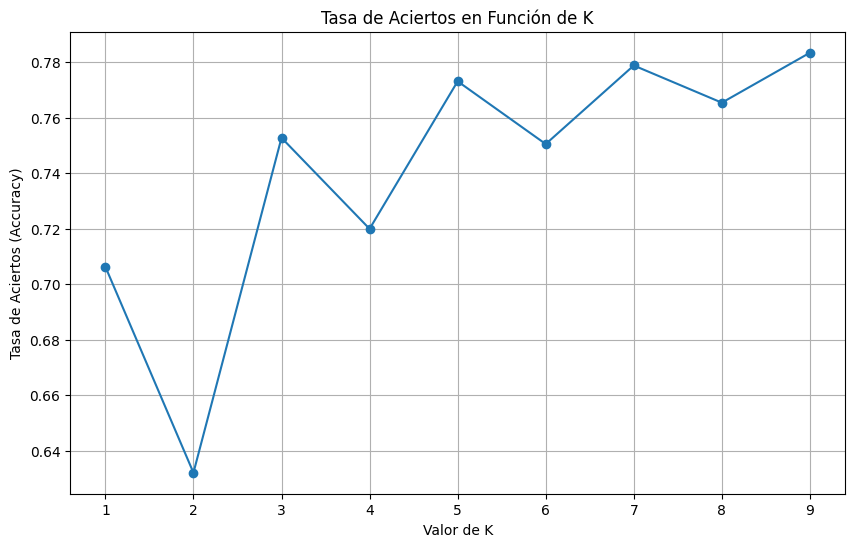

In [51]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNn

precisiones = []
rango_k = range(1,10) # Vamos a buscar en el rango de 1 a 9 (inclusive) vecinos más cercanos

# En cada valor del rango establecido realizará:
for vecinos in rango_k:
    knn = KNn(vecinos) # Establecer los vecinos más cercanos
    knn.fit(X_train, Y_train) # Almacenar los datos de entrenamiento
    prediccion_Y_validacion = knn.predict(X_valid) # Predecir los valores de Y
    precision = accuracy_score(Y_valid, prediccion_Y_validacion) # Validar los valores de Y, guardando su precision
    precisiones.append(precision) # Almacena en una lista las precisiones de cada vecino

mejor_indice = np.argmax(precisiones) # Nos quedamos con el índice del mejor vecino

mejor_valor_k = rango_k[mejor_indice] # Buscamos el valor del mejor vecino según el índice devuelto

# Gráfico de líneas, donde podemos ver la precision que tiene cada algoritmo se tomamos diferentes valores de K-vecinos
plt.figure(figsize=(10, 6))
plt.plot(rango_k, precisiones, marker='o')
plt.xlabel('Valor de K')
plt.ylabel('Tasa de Aciertos (Accuracy)')
plt.title('Tasa de Aciertos en Función de K') 
plt.grid(True)
plt.show()

# Como lo demuestra el gráfico, la mejor precisión la tiene un número para K-vecinos = 9

Seleccione el valor de K a partir del cual el clasificador presenta un desempeño adecuado con los datos de validación. Entrene un nuevo clasificador con este valor de K y evalúe el resultado con los datos de prueba.

In [52]:
from sklearn.neighbors import KNeighborsClassifier as KNn

knn = KNn( mejor_valor_k) # Llamamos al algoritmo y le decimos que busque con los 9 vecinos más cercanos

knn.fit(X_train, Y_train) # Le pasamos los datos de entrenamiento

KNeighborsClassifier(n_neighbors=9)

In [53]:
prediccion_test_y = knn.predict(X_test) # Predecimos los valores de Y, según los datos de testeo que están en X
precision_test = accuracy_score(prestamos_test_labels, prediccion_test_y) # Verificamos la precisión del test comparando los valores reales de Y y los predecidos

C:\Users\Laura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [54]:
precision_test 
# precision del test, teniendo en cuenta los 9 vecinos más cercanos 0.7838

0.7837737391756792